A ternary search tree (TST) is a type of trie-based data structure optimized for storing and retrieving strings efficiently, especially when supporting prefix-based operations like autocomplete.

It supports the following operations:

* insert a string into the TST;
* search for a string in the TST;
* return the number of stored strings;
* print all strings stored in the TST in lexicographic order;
* find all strings that start with a given prefix (autocomplete feature).

# Implementation

We implement two classes, one to represent a node of a ternary search tree, the second to represent the tree.  Only the latter will be used by the user of the data structure, the `TSTNode` class is only for intermal usage.

In [142]:
class TSTreeNode:
    def __init__(self, char):
        self.char = char
        self.is_end = False
        self.left = None
        self.middle = None
        self.right = None

    def _insert(self, word, index=0):
        char = word[index]

        if char < self.char:
            if self.left is None:
                self.left = TSTreeNode(char)
            self.left._insert(word, index)

        elif char > self.char:
            if self.right is None:
                self.right = TSTreeNode(char)
            self.right._insert(word, index)

        else:  # char == self.char
            if index + 1 == len(word):
                self.is_end = True
            else:
                if self.middle is None:
                    self.middle = TSTreeNode(word[index + 1])
                self.middle._insert(word, index + 1)

    def _search(self, word, index=0):
        char = word[index]

        if char < self.char:
            return self.left is not None and self.left._search(word, index)

        elif char > self.char:
            return self.right is not None and self.right._search(word, index)

        else:
            if index == len(word) - 1:
                return self.is_end
            return self.middle is not None and self.middle._search(word, index + 1)

    def _all_words(self, prefix=''):
        words = []
        if self.left:
            words.extend(self.left._all_words(prefix))
        if self.is_end:
            words.append(prefix + self.char)
        if self.middle:
            words.extend(self.middle._all_words(prefix + self.char))
        if self.right:
            words.extend(self.right._all_words(prefix))
        return words

    def _prefix_search(self, prefix, index=0):
        char = prefix[index]
        if char < self.char:
            return self.left._prefix_search(prefix, index) if self.left else []
        elif char > self.char:
            return self.right._prefix_search(prefix, index) if self.right else []
        else:
            if index == len(prefix) - 1:
                result = []
                if self.is_end:
                    result.append(prefix)
                if self.middle:
                    result += self.middle._all_words(prefix)
                return result
            if self.middle:
                return self.middle._prefix_search(prefix, index + 1)
            return []

    def _to_string(self, indent=''):
        repr_str = indent + repr(self) + f" (end={self.is_end})"
        if self.left is not None:
            repr_str += '\n' + self.left._to_string(indent + '  ')
        if self.middle is not None:
            repr_str += '\n' + self.middle._to_string(indent + '  ')
        if self.right is not None:
            repr_str += '\n' + self.right._to_string(indent + '  ')
        return repr_str

    def __repr__(self):
        return f"'{self.char}'"
    
    def _print(self, level=0, branch="root"):
        indent = "    " * level
        marker = f"{branch}: "
        result = f"{indent}{marker}'{self.char}' (end={self.is_end})\n"
        if self.left:
            result += self.left._print(level + 1, "left")
        if self.middle:
            result += self.middle._print(level + 1, "mid")
        if self.right:
            result += self.right._print(level + 1, "right")
        return result



In [143]:
class TSTree:
    def __init__(self):
        self.root = None

    def insert(self, word):
        if not word:
            return
        if self.root is None:
            self.root = TSTreeNode(word[0])
        self.root._insert(word)

    def search(self, word):
        if not word or self.root is None:
            return False
        return self.root._search(word)

    def all_strings(self):
        if self.root is None:
            return []
        return self.root._all_words()

    def starts_with(self, prefix):
        if not prefix or self.root is None:
            return []
        return self.root._prefix_search(prefix)

    def __len__(self):
        return len(self.all_strings())

    def __repr__(self):
        if self.root is None:
            return 'empty tree'
        else:
            return self.root._print()



# Example usage

Create an empty Ternary Search Tree

In [144]:
tst = TSTree()

Display it in íts current state

In [145]:
print(tst)

empty tree


Verify that it has no strings stored

In [146]:
len(tst)

0

Insert the string 'abc'

In [147]:
tst.insert('abc')

Verify that the string now encodes a single string

In [148]:
len(tst)  

1

Insert a second string

In [149]:
tst.insert('aqc')

Now the string has two elements

In [150]:
print(tst)

root: 'a' (end=False)
    mid: 'b' (end=False)
        mid: 'c' (end=True)
        right: 'q' (end=False)
            mid: 'c' (end=True)



Add a third string

In [151]:
tst.insert('aaq')

In [152]:
print(tst)

root: 'a' (end=False)
    mid: 'b' (end=False)
        left: 'a' (end=False)
            mid: 'q' (end=True)
        mid: 'c' (end=True)
        right: 'q' (end=False)
            mid: 'c' (end=True)



Search for a string that is inserted into the ternary tree

In [154]:
tst.search('aaq')

True

List all strings in ternary search tree

In [159]:
tst.all_strings()

['aaq', 'abc', 'aqc']

Search for a prefix 'aa'

In [161]:
tst.starts_with('aa')

['aaq']

# Testing

Create a new TSTree and insert some new words

In [162]:
tst1 = TSTree()
with open('/Users/nguyentruc/Desktop/UHasselt/Concept of Data Science/ternary-search-tree/data/insert_words.txt') as file:
    words = [
        line.strip() for line in file 
    ]
for word in words:
    tst1.insert(word)

unique_words = set(words)


Verify the length of the data structure

In [ ]:
assert len(tst1) == len(unique_words),\
    f'{len(tst1)} in tree, expected {len(unique_words)}'

Verify that all words that were inserted can be found

In [ ]:
for word in unique_words:
    assert tst1.search(word), f"Word '{word}' should be found in the tree."

Check that words in the file 'not_insert_words.txt' can not be found in the tree

In [174]:
with open('/Users/nguyentruc/Desktop/UHasselt/Concept of Data Science/ternary-search-tree/data/not_insert_words.txt') as file:
    for line in file:
        word = line.strip()
        assert not tst1.search(word), f"Word '{word}' should not be found in the tree."

Check that all strings are returned

In [234]:
all_strings = tst1.all_strings()
assert len(all_strings) == len(unique_words), \
    f"Expected {len(unique_words)} unique words, but got {len(all_strings)}."
for word in all_strings:
    assert word in unique_words, f"Word '{word}' is not in the set of unique words."

# Performance

To assess the performance with large dataset, we use file 'corncob_lowercase.txt' (58110 words, all lower case)

In [176]:
with open('/Users/nguyentruc/Desktop/UHasselt/Concept of Data Science/ternary-search-tree/data/corncob_lowercase.txt') as file:
    words = [line.strip() for line in file]
    

In [177]:
len(words)

58110

The words are alphabetically ordered

In [178]:
words[:10]

['ardvark',
 'aardwolf',
 'aaron',
 'aback',
 'abacus',
 'abaft',
 'abalone',
 'abandon',
 'abandoned',
 'abandonmaent']

In [179]:
import random
import time

In [180]:
sizes = [100, 500, 1_000, 5_000, 10_000, 20_000, 30_000, 40_000, 50_000]

In [182]:
samples = [
    random.sample(words, k=size) for size in sizes
]

Now we will time how long it takes to **insert words** into a TSTree of 9 sizes.

In [183]:
nr_runs = 10
times = {}
insert_sample = random.sample(words, k=20)
for sample in samples:
    tstree = TSTree()
    for word in sample:
        tstree.insert(word)
    times[len(sample)] = 0.0
    for _ in range(nr_runs):
        start_time = time.time_ns()
        for word in insert_sample:
            tstree.insert(word)
        end_time = time.time_ns()
        times[len(sample)] += end_time - start_time
    times[len(sample)] /= nr_runs*1_000_000.0
times

{100: 0.5973,
 500: 0.7449,
 1000: 0.9042,
 5000: 0.7009,
 10000: 0.788,
 20000: 0.8285,
 30000: 1.0735,
 40000: 0.8063,
 50000: 0.6989}

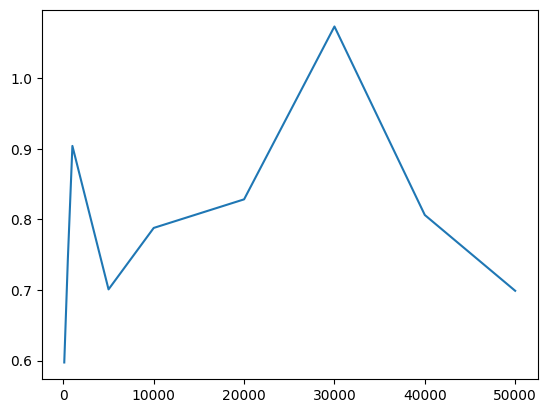

In [184]:
import matplotlib.pyplot as plt
plt.plot(times.keys(), times.values());

We do the same for **searching words** in TSTree.

In [185]:
nr_runs = 10
times = {}
search_sample = random.sample(words, k=20)
for sample in samples:
    tstree = TSTree()
    for word in sample:
        tstree.insert(word)
    times[len(sample)] = 0.0
    for _ in range(nr_runs):
        start_time = time.time_ns()
        for word in search_sample:
            tstree.search(word)
        end_time = time.time_ns()
        times[len(sample)] += end_time - start_time
    times[len(sample)] /= nr_runs*1_000_000.0
times

{100: 0.3954,
 500: 0.3703,
 1000: 0.4778,
 5000: 0.4884,
 10000: 0.6508,
 20000: 0.6282,
 30000: 0.6786,
 40000: 0.6665,
 50000: 0.601}

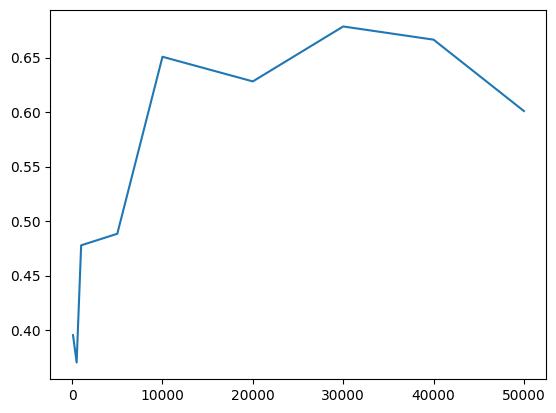

In [187]:
plt.plot(times.keys(), times.values());

In [188]:
nr_runs = 10
times = {}
for sample in samples:
    tstree = TSTree()
    for word in sample:
        tstree.insert(word)
    times[len(sample)] = 0.0
    for _ in range(nr_runs):
        search_sample = random.sample(sample, k=20)
        start_time = time.time_ns()
        for word in search_sample:
            tstree.search(word)
        end_time = time.time_ns()
        times[len(sample)] += end_time - start_time
    times[len(sample)] /= nr_runs*1_000_000.0
times

{100: 0.5774,
 500: 1.4499,
 1000: 0.5999,
 5000: 0.6401,
 10000: 0.7359,
 20000: 0.7427,
 30000: 0.7958,
 40000: 0.9789,
 50000: 0.7896}

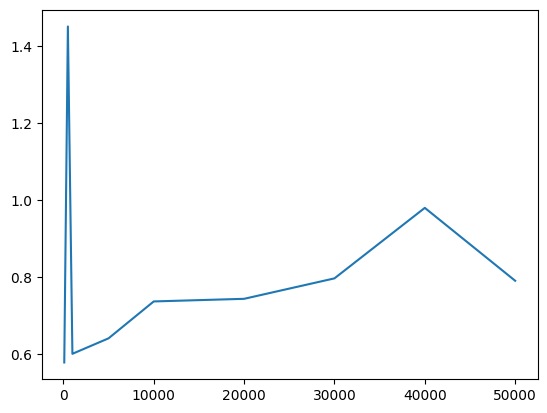

In [189]:
plt.plot(times.keys(), times.values());

# Comparision with SET

In [190]:
with open('/Users/nguyentruc/Desktop/UHasselt/Concept of Data Science/ternary-search-tree/data/corncob_lowercase.txt') as file:
    words = [line.strip() for line in file]
random.shuffle(words)

In [191]:
hold_out_sample = words[-100:]
insert_sample = words[:-100]

In [192]:
%%timeit
word_set = set()
for word in insert_sample:
    word_set.add(word)

43.1 ms ± 17.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [194]:
%%timeit
word_tstree = TSTree()
for word in insert_sample:
    word_tstree.insert(word)

2.46 s ± 106 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [195]:
word_set = set()
for word in insert_sample:
    word_set.add(word)

In [196]:
%%timeit
total = 0
for word in hold_out_sample:
    if word in word_set:
        total += 1

19.1 μs ± 5.13 μs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [197]:
word_tstree = TSTree()
for word in insert_sample:
    word_tstree.insert(word)

In [198]:
%%timeit
total = 0
for word in hold_out_sample:
    if word_tstree.search(word):
        total += 1

3.26 ms ± 300 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


* Insertion: Set is 57x faster than TSTree (43ms vs 2.46s)
* Search: Set is 170x faster than TSTree (19μs vs 3.26ms)
* But TST provides unique prefix search capabilities

# Comparision with BTree

In [223]:
class BtreeNode:
    
    def __init__(self, string):
        self._string = string
        self._lt, self._gt = None, None

    def _insert(self, string):
        if string == self._string:
            return
        if string < self._string:
            if self._lt is None:
                self._lt = BtreeNode(string)
            else:
                self._lt._insert(string)
        elif string > self._string:
            if self._gt is None:
                self._gt = BtreeNode(string)
            else:
                self._gt._insert(string)
    
    def _search(self, string):
        if string == self._string:
            return True
        elif string < self._string:
            return self._lt is not None and self._lt._search(string)
        else:
            return self._gt is not None and self._gt._search(string)
    
    def _all_strings(self):
        strings = [self._string]
        if self._lt is not None:
            strings.extend(self._lt._all_strings())
        if self._gt is not None:
            strings.extend(self._gt._all_strings())
        return strings

    def __len__(self):
        length = 1
        if self._lt is not None:
            length += len(self._lt)
        if self._gt is not None:
            length += len(self._gt)
        return length

    def _to_string(self, indent=''):
        repr_str = indent + repr(self)
        if self._lt is not None:
            repr_str += '\n' + self._lt._to_string(indent + '  ')
        if self._gt is not None:
            repr_str += '\n' + self._gt._to_string(indent + '  ')
        return repr_str

    def __repr__(self):
        return self._string

In [224]:
class Btree:
    
    def __init__(self):
        self._root = None
        
    def insert(self, string):
        if self._root is None:
            self._root = BtreeNode(string)
        else:
            self._root._insert(string)

    def search(self, string):
        if self._root is None:
            return False
        else:
            return self._root._search(string)
        
    def all_strings(self):
        if self._root is None:
            return []
        else:
            return self._root._all_strings()
        
    def __len__(self):
        if self._root is None:
            return 0
        else:
            return len(self._root)
    
    def __repr__(self):
        if self._root is None:
            return 'empty tree'
        else:
            return self._root._to_string('')

In [232]:
btree = Btree()
btree.insert('abc')
btree.insert('aqc')
btree.insert('aaq')
print(btree)

abc
  aaq
  aqc


In [231]:
print(tst)

root: 'a' (end=False)
    mid: 'b' (end=False)
        left: 'a' (end=False)
            mid: 'q' (end=True)
        mid: 'c' (end=True)
        right: 'q' (end=False)
            mid: 'c' (end=True)



TSTree stores characters instead of full words.

In [228]:
import time
import random

# Load and prepare word data
with open('/Users/nguyentruc/Desktop/UHasselt/Concept of Data Science/ternary-search-tree/data/corncob_lowercase.txt') as file:
    words = [line.strip() for line in file]

random.shuffle(words)
hold_out_sample = words[-100:]      # test words
insert_sample = words[:-100]        # train words

# Timing utility
def time_function(func, *args):
    start = time.perf_counter()
    result = func(*args)
    end = time.perf_counter()
    return result, end - start

# Compare Btree and TSTree
def compare_btree_tstree(insert_sample, hold_out_sample, prefix="car"):
    print(f"\n🔍 Inserting {len(insert_sample)} words...")

    btree = Btree()
    tstree = TSTree()

    # Insert
    _, btree_insert_time = time_function(lambda: [btree.insert(w) for w in insert_sample])
    _, tstree_insert_time = time_function(lambda: [tstree.insert(w) for w in insert_sample])

    print(f"Btree insert time:   {btree_insert_time:.4f}s")
    print(f"TSTree insert time:  {tstree_insert_time:.4f}s")

    # Search (using hold-out set)
    _, btree_search_time = time_function(lambda: [btree.search(w) for w in hold_out_sample])
    _, tstree_search_time = time_function(lambda: [tstree.search(w) for w in hold_out_sample])

    print(f"Btree search time:   {btree_search_time:.4f}s")
    print(f"TSTree search time:  {tstree_search_time:.4f}s")

    # All strings
    _, btree_all_time = time_function(btree.all_strings)
    _, tstree_all_time = time_function(tstree.all_strings)

    print(f"Btree all_strings(): {btree_all_time:.4f}s")
    print(f"TSTree all_strings(): {tstree_all_time:.4f}s")

    # Prefix search on TSTree
    _, tstree_prefix_time = time_function(tstree.starts_with, prefix)
    print(f"TSTree prefix search (prefix='{prefix}'): {tstree_prefix_time:.4f}s")

    # Summary
    print("\nSummary:")
    print(f"{'Operation':<20}{'Btree':>12}{'TSTree':>12}")
    print(f"{'-'*44}")
    print(f"{'Insert':<20}{btree_insert_time:12.4f}{tstree_insert_time:12.4f}")
    print(f"{'Search (100)':<20}{btree_search_time:12.4f}{tstree_search_time:12.4f}")
    print(f"{'All Strings':<20}{btree_all_time:12.4f}{tstree_all_time:12.4f}")
    print(f"{'Prefix Search':<20}{'N/A':>12}{tstree_prefix_time:12.4f}")


In [ ]:
compare_btree_tstree(insert_sample, hold_out_sample, prefix="car")


🔍 Inserting 58010 words...
Btree insert time:   0.9389s
TSTree insert time:  1.9207s
Btree search time:   0.0009s
TSTree search time:  0.0007s
Btree all_strings(): 0.0512s
TSTree all_strings(): 0.0885s
TSTree prefix search (prefix='car'): 0.0003s

Summary:
Operation                  Btree      TSTree
--------------------------------------------
Insert                    0.9389      1.9207
Search (100)              0.0009      0.0007
All Strings               0.0512      0.0885
Prefix Search                N/A      0.0003


If working with lots of words (like 50,000 or more), TST is faster for searching and great if you need to find words by prefix. But if you insert words often, Btree is usually quicker.